In [9]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [10]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

In [11]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [12]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [14]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [15]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [16]:
from tqdm.notebook import tqdm

In [17]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [18]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\users\vansh\appdata\local\programs\python\python39\lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [19]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [22]:
x_train = train_features/255.0
x_test = test_features/255.0

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [25]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [26]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [27]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [18]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100
226/226 [==============================] - 566s 2s/step - loss: 1.8235 - accuracy: 0.2437 - val_loss: 1.8084 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 447s 2s/step - loss: 1.7726 - accuracy: 0.2661 - val_loss: 1.6726 - val_accuracy: 0.3309
Epoch 3/100
226/226 [==============================] - 445s 2s/step - loss: 1.6160 - accuracy: 0.3560 - val_loss: 1.4655 - val_accuracy: 0.4312
Epoch 4/100
226/226 [==============================] - 439s 2s/step - loss: 1.4805 - accuracy: 0.4263 - val_loss: 1.3653 - val_accuracy: 0.4641
Epoch 5/100
226/226 [==============================] - 420s 2s/step - loss: 1.4178 - accuracy: 0.4526 - val_loss: 1.3109 - val_accuracy: 0.4921
Epoch 6/100
226/226 [==============================] - 422s 2s/step - loss: 1.3777 - accuracy: 0.4685 - val_loss: 1.2601 - val_accuracy: 0.5209
Epoch 7/100
226/226 [==============================] - 405s 2s/step - loss: 1.3384 - accuracy: 0.4868 - val_loss: 1.2359 - val_accuracy:

In [1]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

NameError: name 'model' is not defined

In [3]:
from keras.models import model_from_json

In [4]:
json_file = open("emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [5]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [6]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

In [37]:
image = 'images/test2.jpeg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of happy
1/1 [==============================] - 0s 32ms/step
model prediction is  happy


In [39]:
image = 'images/test3.jpg'
print("original image is of Neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of Neutral
1/1 [==============================] - 0s 32ms/step
model prediction is  neutral


In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of happy
1/1 [==============================] - 0s 33ms/step
model prediction is  happy


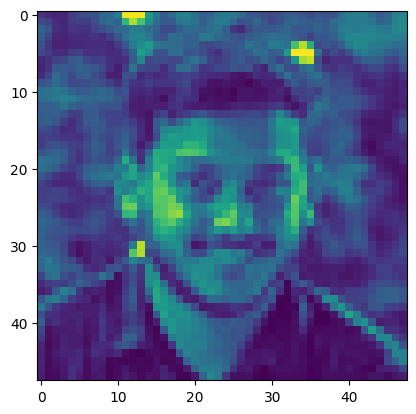

In [46]:
image = 'images/test2.jpeg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48))

original image is of neutral
1/1 [==============================] - 0s 40ms/step
model prediction is  neutral


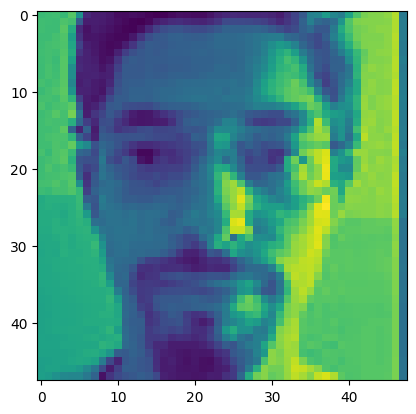

In [45]:
image = 'images/test3.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48))

original image is of neutral
1/1 [==============================] - 0s 64ms/step
model prediction is  neutral


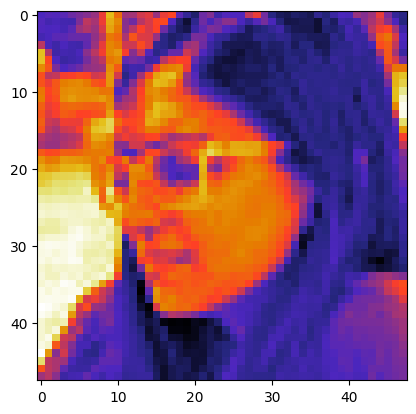

In [54]:
image = 'images/test4.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48), cmap='CMRmap')

original image is of neutral
1/1 [==============================] - 0s 42ms/step
model prediction is  neutral


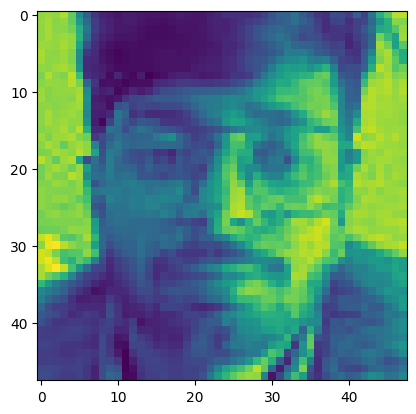

In [56]:
image = 'images/test5.jpg'
print("original image is of neutral")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48))

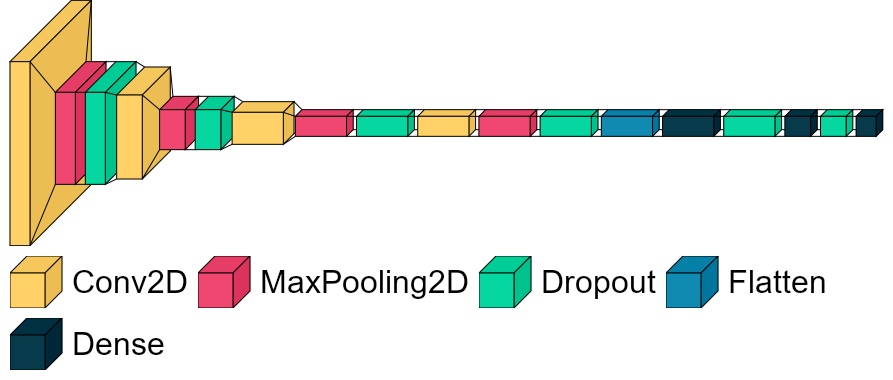

In [11]:
import visualkeras
from PIL import ImageFont

visualkeras.layered_view(model).show() # display using your system viewer
visualkeras.layered_view(model, to_file='output.png') # write to disk
visualkeras.layered_view(model, to_file='output.png').show() # write and show

font = ImageFont.truetype("arial.ttf", 32)  # using comic sans is strictly prohibited!
visualkeras.layered_view(model, legend=True, font=font)  # font is optional!

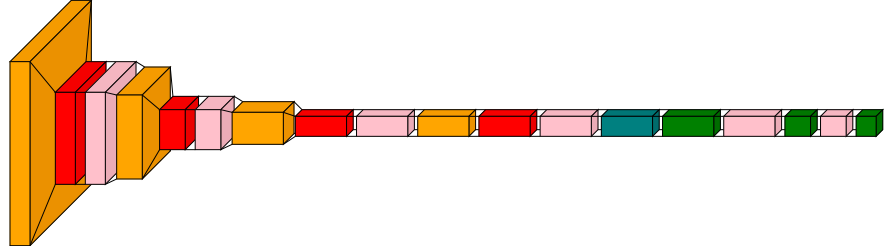

In [9]:
from collections import defaultdict

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'orange'
# color_map[ZeroPadding2D]['fill'] = 'gray'
color_map[Dropout]['fill'] = 'pink'
color_map[MaxPooling2D]['fill'] = 'red'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'teal'

visualkeras.layered_view(model, color_map=color_map)

In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [8]:
confusion_matrix(y_test,y_pred)

NameError: name 'y_test' is not defined

In [20]:
sklearn.metrics.multilabel_confusion_matrix(y_true, y_pred, *, sample_weight=None, labels=None, samplewise=False)

SyntaxError: iterable argument unpacking follows keyword argument unpacking (2936745866.py, line 1)

In [21]:
from sklearn.metrics import multilabel_confusion_matrix

In [28]:
confusion_matrix(y_train, y_test, labels=["1", "2", "3", "4", "5", "6"])

ValueError: Found input variables with inconsistent numbers of samples: [28821, 7066]